<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV1-Music/Matrix

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV1-Music/Matrix


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import plot_confusion_matrix 
import seaborn as sns

In [3]:
df = pd.read_csv('Music_DS.csv',encoding='cp1252')
df = df.dropna(how="any").reset_index(drop=True)
dfCopy = pd.read_csv('Music_DS.csv',encoding='cp1252')
df.drop('Genre',
  axis='columns', inplace=True)
df.drop('Acorsticness',
  axis='columns', inplace=True)
df.drop('Tempo (bpm)',
  axis='columns', inplace=True)
df.drop('Loudness (db)',
  axis='columns', inplace=True)
df.drop('Energy',
  axis='columns', inplace=True)
df.drop('Danceability',
  axis='columns', inplace=True)
df.drop('Valence',
  axis='columns', inplace=True)
df.drop('Instrumentalness',
  axis='columns', inplace=True)
df.drop('Mode',
  axis='columns', inplace=True)
df.drop('Time Signature',
  axis='columns', inplace=True)
df.drop('Key-Name',
  axis='columns', inplace=True)
df.drop('Key',
  axis='columns', inplace=True)
df.head()

,Song_ID,Emotion
0,1,Inspiration
1,2,Sad
2,3,Inspiration
3,4,Inspiration
4,5,Inspiration


In [4]:
dfCopy.drop('Key',
  axis='columns', inplace=True)
dfCopy.drop('Instrumentalness',
  axis='columns', inplace=True)
dfCopy.drop('Time Signature',
  axis='columns', inplace=True)
dfCopy.drop('Mode',
  axis='columns', inplace=True)
dfCopy.head()

,Song_ID,Genre,Acorsticness,Tempo (bpm),Loudness (db),Energy,Danceability,Valence,Key-Name,Emotion
0,1,Pop,0.06,172,-4,0.87,0.55,0.76,D major,Inspiration
1,2,Pop,0.10,92,-6,0.71,0.54,0.29,G major,Sad
2,3,Pop,0.06,115,-7,0.66,0.74,0.34,C major,Inspiration
3,4,Pop,0.04,117,-5,0.89,0.62,0.82,A major,Inspiration
4,5,Pop,0.11,158,-6,0.84,0.63,0.79,B minor,Inspiration


In [5]:
possible_labels = dfCopy.Genre.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Ambient': 10,
 'Blues': 11,
 'Classical': 9,
 'Country': 1,
 'Disco': 6,
 'EDM': 3,
 'Hip hop': 4,
 'Jazz': 5,
 'Metal': 7,
 'Pop': 0,
 'Rock': 2,
 'Techno': 8}

In [6]:
dfCopy['Genre'] = dfCopy.Genre.replace(label_dict)

In [7]:
possible_labelsKeys = dfCopy["Key-Name"].unique()

label_dictKeys = {}
for index, possible_label in enumerate(possible_labelsKeys):
    label_dictKeys[possible_label] = index
label_dictKeys

{'A major': 3,
 'A minor': 14,
 'A# major': 11,
 'A# minor': 24,
 'B major': 23,
 'B minor': 4,
 'C major': 2,
 'C minor': 17,
 'C# Minor': 6,
 'C# major': 5,
 'C# minor': 9,
 'D major': 0,
 'D minor': 18,
 'D# major': 10,
 'D# minor': 22,
 'E major': 12,
 'E minor': 13,
 'F major': 21,
 'F minor': 19,
 'F# major': 8,
 'F# minor': 15,
 'G major': 1,
 'G minor': 20,
 'G# major': 7,
 'G# minor': 16}

In [8]:
dfCopy['Key-Name'] = dfCopy["Key-Name"].replace(label_dictKeys)

Stratification - Dealing with inbalanced data set

In [9]:
def get_class_counts(dataframe):
  grp = dataframe.groupby(['Emotion'])['Song_ID'].nunique()
  return {key:grp[key] for key in list(grp.keys())}

def get_class_proportions(dataframe):
  class_counts = get_class_counts(dataframe)
  return {val[0]: round(val[1]/dataframe.shape[0], 4) for val in class_counts.items()}

print("Dataset class counts", get_class_counts(dfCopy))
print("Dataset class proportions", get_class_proportions(dfCopy))

Dataset class counts {'Angry': 130, 'Calm': 61, 'Happy': 179, 'Inspiration': 84, 'Love': 133, 'Sad': 140, 'Tense': 73}
Dataset class proportions {'Angry': 0.1625, 'Calm': 0.0762, 'Happy': 0.2238, 'Inspiration': 0.105, 'Love': 0.1662, 'Sad': 0.175, 'Tense': 0.0912}


In [10]:
from sklearn.model_selection import train_test_split

train_, test_ = train_test_split(dfCopy, test_size=0.2)

train_class_proportions = get_class_proportions(train_)
test_class_proportions = get_class_proportions(test_)

print("Train data class proportions", train_class_proportions)
print("Test data class proportions", test_class_proportions)

train_stratify, test_stratify = train_test_split(dfCopy, test_size=0.2, stratify=dfCopy['Emotion'])

train_class_proportions_stratify = get_class_proportions(train_stratify)
test_class_proportions_stratify = get_class_proportions(test_stratify)

print("Train data class proportions after stratifying", train_class_proportions_stratify)
print("Test data class proportions after stratifying", test_class_proportions_stratify)

Train data class proportions {'Angry': 0.1625, 'Calm': 0.0781, 'Happy': 0.2297, 'Inspiration': 0.0953, 'Love': 0.175, 'Sad': 0.1703, 'Tense': 0.0891}
Test data class proportions {'Angry': 0.1625, 'Calm': 0.0688, 'Happy': 0.2, 'Inspiration': 0.1438, 'Love': 0.1312, 'Sad': 0.1938, 'Tense': 0.1}
Train data class proportions after stratifying {'Angry': 0.1625, 'Calm': 0.0766, 'Happy': 0.2234, 'Inspiration': 0.1047, 'Love': 0.1672, 'Sad': 0.175, 'Tense': 0.0906}
Test data class proportions after stratifying {'Angry': 0.1625, 'Calm': 0.075, 'Happy': 0.225, 'Inspiration': 0.1062, 'Love': 0.1625, 'Sad': 0.175, 'Tense': 0.0938}


In [11]:
from sklearn.model_selection import train_test_split

all_indices = list(range(len(dfCopy)))
train_indices, test_indices = train_test_split(all_indices, test_size=0.2,stratify=dfCopy['Emotion'])

train = dfCopy.iloc[train_indices, 1:9].values
test = dfCopy.iloc[train_indices, -1].values
Songs_train = dfCopy.iloc[train_indices, 0].values
Songs_test = dfCopy.iloc[test_indices, 0].values
len(Songs_train), len(Songs_test)

(640, 160)

In [12]:
X = dfCopy.iloc[:, 1:9].values
Y = dfCopy.iloc[:, -1].values
Song_IDs = dfCopy['Song_ID'].values

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
X = np.array(X)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=dfCopy['Emotion'])

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_predNB = gnb.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predNB)
print(cm)
accuracy_score(y_test, y_predNB)

[[11  0  5  0  5  3  2]
 [ 0  9  0  0  0  2  1]
 [ 3  0 23  6  2  0  2]
 [ 0  1  3 11  0  0  2]
 [ 2  2 15  0  6  1  0]
 [ 1  3 10  0  1 11  2]
 [ 1  2  2  1  2  0  7]]


0.4875

In [19]:
encodedPredValues = pd.get_dummies(y_predNB)
encodedPredValues

,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...
155,0,0,1,0,0,0,0
156,0,0,1,0,0,0,0
157,1,0,0,0,0,0,0
158,0,0,1,0,0,0,0


In [20]:
encodedPredValues['Song'] = Songs_test
encodedPredValues

,0,1,2,3,4,5,6,Song
0,1,0,0,0,0,0,0,462
1,0,1,0,0,0,0,0,126
2,0,0,0,1,0,0,0,496
3,1,0,0,0,0,0,0,398
4,0,0,0,1,0,0,0,539
...,...,...,...,...,...,...,...,...
155,0,0,1,0,0,0,0,610
156,0,0,1,0,0,0,0,92
157,1,0,0,0,0,0,0,29
158,0,0,1,0,0,0,0,122


In [29]:
song_emo_matrix = encodedPredValues.iloc[: , 0:7].values
song_emo_matrix

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

In [32]:
music_weight = 2

music_emotion_matrix = np.multiply(music_weight,song_emo_matrix)
music_emotion_matrix 

array([[2, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       [0, 0, 0, ..., 2, 0, 0]], dtype=uint8)

In [33]:
overall_emotion_matrix = np.add(music_emotion_matrix, song_emo_matrix)
overall_emotion_matrix

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 3, ..., 0, 0, 0],
       [0, 0, 0, ..., 3, 0, 0]], dtype=uint8)

In [34]:
#Transpose of matrix
overall_emotion_matrix.T

array([[3, 0, 0, ..., 3, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 3, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [21]:
df.values

array([[1, 'Inspiration'],
       [2, 'Sad'],
       [3, 'Inspiration'],
       ...,
       [798, 'Love'],
       [799, 'Inspiration'],
       [800, 'Love']], dtype=object)

In [22]:
encodedDF = pd.get_dummies(df.Emotion)
encodedDF.head()

,Angry,Calm,Happy,Inspiration,Love,Sad,Tense
0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [23]:
encodedDF.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=uint8)

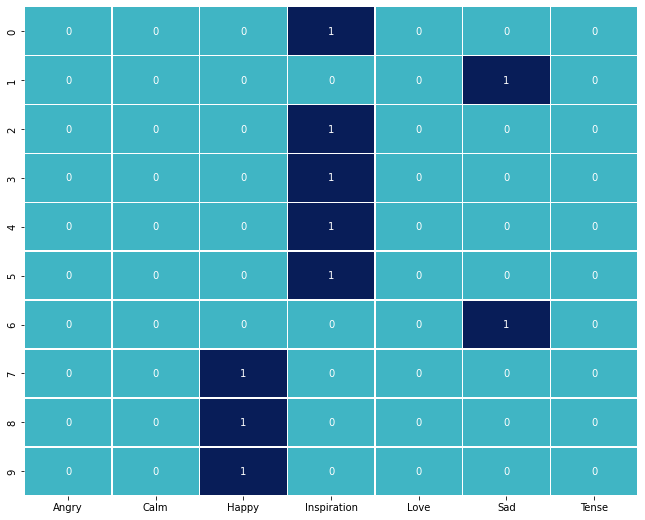

In [24]:
flights = encodedDF[0:10]
f, ax = plt.subplots(figsize=(11, 9))
ax = sns.heatmap(flights, vmin=0, vmax=1, center=0, annot=True, fmt="d",linewidths=.5, cmap="YlGnBu", cbar=False)


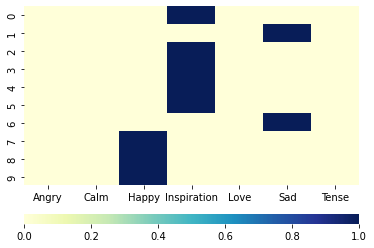

In [25]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
bx = sns.heatmap(flights, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"},
                 cmap="YlGnBu",
                 )


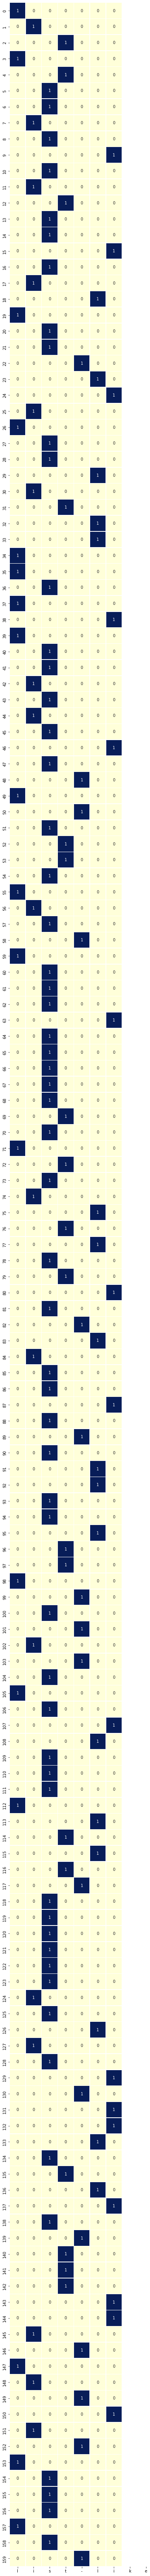

In [26]:
f, ax = plt.subplots(figsize=(25, 120))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
emotionGrid = encodedPredValues.iloc[:, 0:7]
plt.xlabel("Songs_test")

sns.heatmap(emotionGrid, vmax=.3, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap="YlGnBu", cbar=False, annot=True, xticklabels='list-like')